# Importando Bibliotecas e Funções

In [1]:
#importando módulos
import functions
from functions import *

import visualization
from visualization import *


In [2]:
#aumentar display de linhas e colunas
pd.set_option('display.max_columns',350)

pd.set_option('display.min_rows',30)
pd.set_option('display.max_rows',300)

In [3]:
#caminho para as requisicoes
stream_req = 'https://v3.football.api-sports.io/fixtures?date='
fix_req = "https://v3.football.api-sports.io/fixtures?ids="
odds_req = 'https://v3.football.api-sports.io/odds?fixture='
pred_req = 'https://v3.football.api-sports.io/predictions?fixture='
hxh_req = 'https://v3.football.api-sports.io/fixtures/headtohead?h2h='

# 1. Request de Partidas Recentes, a Ocorrer ou Futuras
#### - Histórico de Confrontos, Previsões da API, Análises de Momento para Bets

## 1.1 Buscar as partidas que ainda ocorrerão

In [4]:
#cria um range de datas para +- X dias

from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')

#seleciona a range de datas
import datetime
x_dias_inicio = 0
x_dias_fim = 5

#date = hoje, datet0 = hoje - X dias, datet1 = hoje + X dias
datet0 = (datetime.date.today()) + datetime.timedelta(days=-x_dias_inicio)
datet1 = (datetime.date.today()) + datetime.timedelta(days=+x_dias_fim)

In [5]:
#escolher data inicio e fim - opcoes (date = hoje, datet0 = hoje - X dias, datet1 = hoje + X dias)

#data inicio
print(datet0)

#data fim
print(datet1)

#puxa as datas de inicio até a data fim
date_list = (pd.date_range(start=datet0, end=datet1,
                           freq='D')).strftime('%Y-%m-%d').tolist()
date_list

2023-05-02
2023-05-07


['2023-05-02',
 '2023-05-03',
 '2023-05-04',
 '2023-05-05',
 '2023-05-06',
 '2023-05-07']

In [6]:
df_stream = pd.concat([functions.req_padrao(stream_req,i) for i in date_list])

In [7]:
#verifica a quantidade de partidas por 'status'
print(df_stream.groupby(['fixture.status.long']).size())

#confere a quantidade de partidas que ainda não ocorreram
print(len(df_stream[df_stream['fixture.status.short']=='NS']))

fixture.status.long
First Half               5
Halftime                 4
Match Cancelled         40
Match Finished         108
Match Postponed         38
Not Started           3173
Time to be defined     114
dtype: int64
3173


## 1.2 Selecionar Partida

In [8]:
#buscar partidas no país desejada
print('Digite o número referente a um país para visualizar as ligas com partidas nas datas selecionadas')
print(list(enumerate(df_stream['league.country'].unique())))
input_country_number = int(input())
country_name =  df_stream['league.country'].unique()[input_country_number]

partidas_stream_country = (df_stream[df_stream['league.country']==str(country_name)])

Digite o número referente a um país para visualizar as ligas com partidas nas datas selecionadas
[(0, 'Ecuador'), (1, 'Costa-Rica'), (2, 'Jamaica'), (3, 'Colombia'), (4, 'Mexico'), (5, 'Peru'), (6, 'South-Korea'), (7, 'Mongolia'), (8, 'Bhutan'), (9, 'World'), (10, 'Australia'), (11, 'England'), (12, 'Kyrgyzstan'), (13, 'Greece'), (14, 'Armenia'), (15, 'Sudan'), (16, 'Ethiopia'), (17, 'Uzbekistan'), (18, 'Syria'), (19, 'Uganda'), (20, 'Egypt'), (21, 'Turkey'), (22, 'Poland'), (23, 'Romania'), (24, 'Bulgaria'), (25, 'Czech-Republic'), (26, 'Norway'), (27, 'Lithuania'), (28, 'Estonia'), (29, 'Oman'), (30, 'Latvia'), (31, 'Serbia'), (32, 'Finland'), (33, 'Austria'), (34, 'Germany'), (35, 'Azerbaidjan'), (36, 'Saudi-Arabia'), (37, 'Netherlands'), (38, 'France'), (39, 'Sweden'), (40, 'Spain'), (41, 'South-Africa'), (42, 'Israel'), (43, 'Iceland'), (44, 'Bosnia'), (45, 'Northern-Ireland'), (46, 'Argentina'), (47, 'Slovenia'), (48, 'Bolivia'), (49, 'Brazil'), (50, 'Cameroon'), (51, 'Canada'), 

In [9]:
#mostra todas as ligas para a selecao de partidas
print(list(enumerate(partidas_stream_country['league.name'].unique())))

#buscar partidas na liga desejada
print('Insira a liga desejada')
input_league_name = int(input())
league_name = partidas_stream_country['league.name'].unique()[input_league_name]

partidas_stream_country_league = partidas_stream_country.query("`league.name` == '" + league_name + "'")\
[['fixture.id','fixture.date','teams.home.name',\
  'teams.away.name','league.country']]

partidas_stream_country_league

[(0, 'Division 2 - Östra Götaland'), (1, 'Superettan'), (2, 'Damallsvenskan'), (3, 'Allsvenskan'), (4, 'Division 2 - Norra Götaland'), (5, 'Division 2 - Södra Svealand'), (6, 'Division 2 - Norrland'), (7, 'Ettan - Norra'), (8, 'Ettan - Södra'), (9, 'Elitettan'), (10, 'Division 2 - Norra Svealand'), (11, 'Division 2 - Västra Götaland')]
Insira a liga desejada


,fixture.id,fixture.date,teams.home.name,teams.away.name,league.country
217,1001847,2023-05-03T17:00:00+00:00,IF elfsborg,Halmstad,Sweden
218,1001848,2023-05-03T17:00:00+00:00,BK Hacken,Djurgardens IF,Sweden
219,1001849,2023-05-03T17:00:00+00:00,kalmar FF,Sirius,Sweden
220,1001850,2023-05-03T17:00:00+00:00,Mjallby AIF,AIK stockholm,Sweden
122,1001851,2023-05-04T17:00:00+00:00,IFK Goteborg,Degerfors IF,Sweden
123,1001852,2023-05-04T17:00:00+00:00,IFK Norrkoping,Hammarby FF,Sweden
124,1001853,2023-05-04T17:00:00+00:00,IFK Varnamo,IF Brommapojkarna,Sweden
125,1001854,2023-05-04T17:00:00+00:00,Varbergs BoIS FC,Malmo FF,Sweden
652,1001855,2023-05-07T13:00:00+00:00,Malmo FF,AIK stockholm,Sweden
895,1001856,2023-05-07T15:30:00+00:00,Halmstad,BK Hacken,Sweden


In [10]:
# opção - selecionar o ID específico da partida para a qual se deseja ver as estatísticas

print('Insira o ID da Partida desejada')
print(list(enumerate(partidas_stream_country_league['fixture.id'])))
display(partidas_stream_country_league.reset_index(drop = True))
input_fixture = int(input())
input_fixture = partidas_stream_country_league['fixture.id'].unique()[input_fixture]


partidas_stream_country_league_fixture = df_stream\
.query("`fixture.id`=="+str(input_fixture))

print("\n ===== OUTPUT =====")
partidas_stream_country_league_fixture[['fixture.date','teams.home.name','teams.away.name']]

Insira o ID da Partida desejada
[(0, 1001847), (1, 1001848), (2, 1001849), (3, 1001850), (4, 1001851), (5, 1001852), (6, 1001853), (7, 1001854), (8, 1001855), (9, 1001856)]


,fixture.id,fixture.date,teams.home.name,teams.away.name,league.country
0,1001847,2023-05-03T17:00:00+00:00,IF elfsborg,Halmstad,Sweden
1,1001848,2023-05-03T17:00:00+00:00,BK Hacken,Djurgardens IF,Sweden
2,1001849,2023-05-03T17:00:00+00:00,kalmar FF,Sirius,Sweden
3,1001850,2023-05-03T17:00:00+00:00,Mjallby AIF,AIK stockholm,Sweden
4,1001851,2023-05-04T17:00:00+00:00,IFK Goteborg,Degerfors IF,Sweden
5,1001852,2023-05-04T17:00:00+00:00,IFK Norrkoping,Hammarby FF,Sweden
6,1001853,2023-05-04T17:00:00+00:00,IFK Varnamo,IF Brommapojkarna,Sweden
7,1001854,2023-05-04T17:00:00+00:00,Varbergs BoIS FC,Malmo FF,Sweden
8,1001855,2023-05-07T13:00:00+00:00,Malmo FF,AIK stockholm,Sweden
9,1001856,2023-05-07T15:30:00+00:00,Halmstad,BK Hacken,Sweden



 ===== OUTPUT =====


,fixture.date,teams.home.name,teams.away.name
218,2023-05-03T17:00:00+00:00,BK Hacken,Djurgardens IF


In [11]:
#Abreviar o objeto para as próximas etapas
psclf = partidas_stream_country_league_fixture.copy()
psclf

,fixture.id,fixture.referee,fixture.timezone,fixture.date,fixture.timestamp,fixture.periods.first,fixture.periods.second,fixture.venue.id,fixture.venue.name,fixture.venue.city,fixture.status.long,fixture.status.short,fixture.status.elapsed,league.id,league.name,league.country,league.logo,league.flag,league.season,league.round,teams.home.id,teams.home.name,teams.home.logo,teams.home.winner,teams.away.id,teams.away.name,teams.away.logo,teams.away.winner,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away
218,1001848,None,UTC,2023-05-03T17:00:00+00:00,1683133200,NaN,None,1511.0,Bravida Arena,Göteborg,Not Started,NS,None,113,Allsvenskan,Sweden,https://media-2.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/se.svg,2023,Regular Season - 6,367,BK Hacken,https://media-1.api-sports.io/football/teams/3...,None,364,Djurgardens IF,https://media-3.api-sports.io/football/teams/3...,None,None,None,NaN,NaN,None,None,None,None,None,None


## 1.3 Buscar todas as estatísticas de confrontos anteriores

In [12]:
#busca o id dos times que se enfrentarão e coloca no formato 'id1-id2' para fazer a requisição HeadxHead
hxh_list = (psclf['teams.home.id']).astype(str) + '-' + (psclf['teams.away.id']).astype(str)
hxh_list = list(hxh_list)

hxh_fixture = list(psclf['fixture.id'])

In [13]:
#faz a requisição dos confrontos anteriores entre os times que irão jogar
hxh_stats = pd.concat([req_hxh(hxh_req,i,j) for i,j in zip(hxh_list, hxh_fixture)]).reset_index(drop =  True)

In [14]:
#cria lista de ids dos conflitos que servirá para iteração
hxh_stats_list = list(hxh_stats['fixture.id'])

In [15]:
#confere o tamanho
print("Quantidade de Confrontos anteriores entre os 2 Times")
print(len(hxh_stats_list))

Quantidade de Confrontos anteriores entre os 2 Times
17


In [16]:
#cria a variável 'resultado', indicando se foi vitória do time da casa, empate ou vitória do visitante
hxh_stats['resultado'] = np.where(hxh_stats['teams.away.winner']==False,\
'Hw',np.where(hxh_stats['teams.away.winner']==True,'Aw','D'))

In [17]:
#faz a requisição dos dados das partidas - estatisticas gerais, jogadores, lineups e eventos
df_stats = pd.concat([req_padrao(fix_req,i) for i in hxh_stats_list]).sort_values(by = 'fixture.date')

In [18]:
#df_stats

In [19]:
#aplica a função para extrair as informações dos campos statisticas, players e lineups
df_stats_complete = functions.transform_fixture(df_stats)

In [20]:
#dobra o tamanho dataframe de HeadxHead dos times que se enfrentarão, dividindo os jogos em 1 linha por time
hxh_home = hxh_stats.copy()
hxh_home['team.id'] = hxh_home['teams.home.id']

hxh_away = hxh_stats.copy()
hxh_away['team.id'] = hxh_away['teams.away.id']

hxh_concat = pd.concat([hxh_home,hxh_away]).sort_values(by = 'fixture.date')

hxh_concat.tail()

,fixture.id,fixture.referee,fixture.timezone,fixture.date,fixture.timestamp,fixture.periods.first,fixture.periods.second,fixture.venue.id,fixture.venue.name,fixture.venue.city,fixture.status.long,fixture.status.short,fixture.status.elapsed,league.id,league.name,league.country,league.logo,league.flag,league.season,league.round,teams.home.id,teams.home.name,teams.home.logo,teams.home.winner,teams.away.id,teams.away.name,teams.away.logo,teams.away.winner,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away,fixture.id.ns,resultado,team.id
8,1014503,G. Nyberg,UTC,2023-03-19T14:00:00+00:00,1679234400,1.679234e+09,1.679238e+09,1511.0,Bravida Arena,Göteborg,Match Finished,FT,90.0,115,Svenska Cupen,Sweden,https://media-2.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/se.svg,2022,Semi-finals,367,BK Hacken,https://media-2.api-sports.io/football/teams/3...,True,364,Djurgardens IF,https://media-3.api-sports.io/football/teams/3...,False,3.0,0.0,2.0,0.0,3.0,0.0,None,None,None,None,1001848,Hw,367
7,1001848,None,UTC,2023-05-03T17:00:00+00:00,1683133200,NaN,NaN,1511.0,Bravida Arena,Göteborg,Not Started,NS,NaN,113,Allsvenskan,Sweden,https://media-1.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/se.svg,2023,Regular Season - 6,367,BK Hacken,https://media-2.api-sports.io/football/teams/3...,None,364,Djurgardens IF,https://media-1.api-sports.io/football/teams/3...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1001848,D,364
7,1001848,None,UTC,2023-05-03T17:00:00+00:00,1683133200,NaN,NaN,1511.0,Bravida Arena,Göteborg,Not Started,NS,NaN,113,Allsvenskan,Sweden,https://media-1.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/se.svg,2023,Regular Season - 6,367,BK Hacken,https://media-2.api-sports.io/football/teams/3...,None,364,Djurgardens IF,https://media-1.api-sports.io/football/teams/3...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1001848,D,367
16,1001943,None,UTC,2023-05-24T17:00:00+00:00,1684947600,NaN,NaN,1506.0,Tele2 Arena,Stockholm,Not Started,NS,NaN,113,Allsvenskan,Sweden,https://media-1.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/se.svg,2023,Regular Season - 18,364,Djurgardens IF,https://media-1.api-sports.io/football/teams/3...,None,367,BK Hacken,https://media-3.api-sports.io/football/teams/3...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1001848,D,364
16,1001943,None,UTC,2023-05-24T17:00:00+00:00,1684947600,NaN,NaN,1506.0,Tele2 Arena,Stockholm,Not Started,NS,NaN,113,Allsvenskan,Sweden,https://media-1.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/se.svg,2023,Regular Season - 18,364,Djurgardens IF,https://media-1.api-sports.io/football/teams/3...,None,367,BK Hacken,https://media-3.api-sports.io/football/teams/3...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1001848,D,367


In [21]:
#faz um merge com os dados de estatísticas gerais, jogadores e formation
 #o intuito e unir as informações de cada time com sua respectiva linha

hxh_complete = \
hxh_concat.merge(df_stats_complete[3], on=['fixture.id', 'team.id'], how='left')\
.merge(df_stats_complete[2], on=['fixture.id', 'team.id', 'team.name'],how='left')\
.merge(df_stats_complete[1],on=['fixture.id', 'team.id', 'team.name','team.logo'],how='left')

#hxh_complete

In [22]:
#cria uma variável 'wdl' indicando se o time daquela linha ganhou (W), perdeu (L) ou empatou (D) para cada confronto anterior

hxh_complete['wdl'] = np.where(
    (hxh_complete['teams.away.winner'] == True) &
    (hxh_complete['team.id'] == hxh_complete['teams.away.id']), 'W',
    np.where((hxh_complete['teams.home.winner'] == True) &
             (hxh_complete['team.id'] == hxh_complete['teams.home.id']), 'W',
             np.where((hxh_complete['teams.home.winner'] == False) &
                      (hxh_complete['team.id'] == hxh_complete['teams.home.id']), 'L',
                      np.where((hxh_complete['teams.away.winner'] == False) &
                               (hxh_complete['team.id'] == hxh_complete['teams.away.id']), 'L',
                               'D'))))

In [23]:
#cria uma variável 'gols' indicando quantos gols o time daquela linha fez na partida

hxh_complete['gols'] = np.where((hxh_complete['teams.home.id'] == hxh_complete['team.id']),
                        hxh_complete['score.fulltime.home'],
                        np.where((hxh_complete['teams.away.id'] == hxh_complete['team.id']),
                                 hxh_complete['score.fulltime.away'], np.nan)).astype('float')

In [24]:
#filtra, do dataframe de confrontos, apenas aqueles que já ocorreram

hxh_complete = hxh_complete[(hxh_complete['fixture.status.short']!='NS') & (hxh_complete['fixture.status.short']!='TBD')]

In [25]:
#filtra apenas as colunas relevantes para analise dos confrontos

hxh_complete = hxh_complete.filter(['fixture.id','fixture.date','fixture.venue.id','fixture.status.long','fixture.status.short','fixture.status.elapsed','league.id',
 'league.name','league.country','league.logo','league.flag','league.season','league.round','teams.home.id','teams.home.name','teams.home.logo','teams.home.winner','teams.away.id',
 'teams.away.name','teams.away.logo','teams.away.winner','gols','score.penalty.home','score.penalty.away','fixture.id.ns','resultado','team.id','team.name','team.logo','Ball Possession',
 'Blocked Shots','Corner Kicks','Fouls','Goalkeeper Saves','Offsides','Passes %','Passes accurate','Red Cards','Shots insidebox','Shots off Goal','Shots on Goal','Shots outsidebox',
 'Total Shots','Total passes','Yellow Cards','statistics.offsides','statistics.shots.total','statistics.shots.on','statistics.goals.total','statistics.goals.conceded','statistics.goals.assists',
 'statistics.goals.saves','statistics.passes.total','statistics.passes.key','statistics.passes.accuracy','statistics.tackles.total','statistics.tackles.blocks','statistics.tackles.interceptions',
 'statistics.duels.total','statistics.duels.won','statistics.dribbles.attempts','statistics.dribbles.success','statistics.dribbles.past','statistics.fouls.drawn','statistics.fouls.committed',
 'statistics.cards.yellow','statistics.cards.red','statistics.penalty.won','statistics.penalty.commited','statistics.penalty.scored','statistics.penalty.missed','statistics.penalty.saved',
 'statistics.games.rating','statistics.games.rating.D','statistics.games.rating.F','statistics.games.rating.M','formation','startXI','substitutes','coach.id',
 'coach.name','coach.photo','wdl'])

In [26]:
#faz uma iteração pelo histórico de conflitos
    #retorna as estatísticas das partidas anteriores
        #agregadas
        #divididas pela quantia de gols de cada time
        #divididas pela quantidade de partidas
c = []

confronto = hxh_complete.sort_values(
    by='fixture.date').dropna(subset='fixture.status.elapsed').tail(10)
confronto_gp = confronto.groupby(['team.id',
                        'wdl']).size().to_frame().reset_index()

# agrupa os resultados por equipe e WDL, somando os valores
grouped = confronto_gp.groupby(['team.id', 'wdl']).sum()

# reorganiza os dados em uma tabela pivô, com colunas para W, D e L
pivoted = grouped.pivot_table(index='team.id',
                              columns='wdl',
                              values=0,
                              fill_value=0)

# remove o nome das colunas e reorganiza a ordem das colunas
if 'W' in pivoted.columns:
    pass  # do nothing
else:
    pivoted.loc[:, 'W'] = 0

if 'D' in pivoted.columns:
    pass  # do nothing
else:
    pivoted.loc[:, 'D'] = 0

if 'L' in pivoted.columns:
    pass  # do nothing
else:
    pivoted.loc[:, 'L'] = 0

# reorganiza as linhas pelo ID da equipe
wdl = pivoted.reset_index().sort_values('team.id')

gols = confronto.groupby('team.id')['gols'].sum().to_frame().astype(
    float).reset_index()

agg = confronto.groupby('team.id').sum().iloc[:, 5:].drop(columns=['fixture.id.ns'])

pergame = agg.reset_index().copy().set_index('team.id')
pergame.iloc[:, :] = pergame.iloc[:, :].div(
    confronto_gp.groupby('team.id').sum().values, axis=0)
pergame.columns = [str(col) + '.pergame' for col in pergame.columns]
pergame = pergame.reset_index()

pergols = agg.reset_index().set_index('team.id')
pergols.iloc[:, :] = pergols.iloc[:, :].div(pergols.gols, axis=0)
pergols.columns = [str(col) + '.pergols' for col in pergols.columns]
pergols = pergols.reset_index().drop(columns = 'gols.pergols')

agg.columns = [str(col) + '.agg' for col in agg.columns]
agg = agg.reset_index()

form = confronto.groupby('team.id')['formation'].nunique().reset_index(
).rename(columns={'formation': 'form_cont'})

qthxh = confronto_gp.groupby('team.id',
                   as_index=False).sum().rename(columns={0: 'qt.hxh'})

conf = wdl.merge(gols, how='left').merge(agg, how='left').merge(pergame, how='left').merge(
        pergols, how='left', on = 'team.id').merge(form, how='left').merge(qthxh,
                                                           how='left')
c.append(conf)
        
df_confronto = pd.concat(c)

In [27]:
#Remove colunas residuais das ultimas transformacoes, que nao fazem sentido para analise
 #como a o agregado da posse de bola dos times
    #afinal, nao faz sentido somar porcentagens de 0 a 100
prefixes_to_drop = [
'teams.home.id.agg',
'teams.away.id.agg',                             
"goals.",
"Ball Possession.agg",
"Passes %.agg",
"score.",
"statistics.cards",
"statistics.fouls",
"statistics.games.rating.agg",
"statistics.games.rating.D.agg",
"statistics.games.rating.D.pergols",
"statistics.games.rating.pergols",
"statistics.games.rating.F.agg",
"statistics.games.rating.M.agg",                   
"statistics.games.rating.F.pergols",
"statistics.games.rating.M.pergols",
"statistics.passes.accuracy.agg"
"statistics.goals",
"statistics.offsides",
"statistics.shots.",
"gols.agg",
'Passes %.pergols']

cols_to_drop = [col for col in df_confronto.columns if col.startswith(tuple(prefixes_to_drop))]
# Drop the columns from the dataframe
df_confronto = df_confronto.drop(columns=cols_to_drop)

In [28]:
#dobra o tamanho dataframe, dividindo os jogos em 1 linha por time

psclf_home = psclf.copy()
psclf_home['team.id'] = psclf_home['teams.home.id']

psclf_away = psclf.copy()
psclf_away['team.id'] = psclf_away['teams.away.id']

psclf_concat = pd.concat([psclf_home,psclf_away]).sort_values(by = 'fixture.date')

In [29]:
#faz um merge das estatisticas produzidas acima com a base anterior, das partidas

df_confronto = psclf_concat[[
    'fixture.id', 'fixture.date', 'fixture.status.long', 'league.id',
    'league.name', 'league.country', 'league.season', 'league.round',
    'teams.home.id', 'teams.home.name', 'teams.home.logo', 'teams.away.id',
    'teams.away.name', 'teams.away.logo', 'team.id'
]].merge(df_confronto, how = 'left')

In [30]:
#visualiza os dados
df_confronto.sort_values(by = 'fixture.id', ascending = False)

,fixture.id,fixture.date,fixture.status.long,league.id,league.name,league.country,league.season,league.round,teams.home.id,teams.home.name,teams.home.logo,teams.away.id,teams.away.name,teams.away.logo,team.id,L,W,D,gols,Blocked Shots.agg,Corner Kicks.agg,Fouls.agg,Goalkeeper Saves.agg,Offsides.agg,Passes accurate.agg,Red Cards.agg,Shots insidebox.agg,Shots off Goal.agg,Shots on Goal.agg,Shots outsidebox.agg,Total Shots.agg,Total passes.agg,Yellow Cards.agg,statistics.goals.total.agg,statistics.goals.conceded.agg,statistics.goals.assists.agg,statistics.goals.saves.agg,statistics.passes.total.agg,statistics.passes.key.agg,statistics.passes.accuracy.agg,statistics.tackles.total.agg,statistics.tackles.blocks.agg,statistics.tackles.interceptions.agg,statistics.duels.total.agg,statistics.duels.won.agg,statistics.dribbles.attempts.agg,statistics.dribbles.success.agg,statistics.dribbles.past.agg,statistics.penalty.won.agg,statistics.penalty.commited.agg,statistics.penalty.scored.agg,statistics.penalty.missed.agg,statistics.penalty.saved.agg,teams.home.id.pergame,teams.away.id.pergame,gols.pergame,Ball Possession.pergame,Blocked Shots.pergame,Corner Kicks.pergame,Fouls.pergame,Goalkeeper Saves.pergame,Offsides.pergame,Passes %.pergame,Passes accurate.pergame,Red Cards.pergame,Shots insidebox.pergame,Shots off Goal.pergame,Shots on Goal.pergame,Shots outsidebox.pergame,Total Shots.pergame,Total passes.pergame,Yellow Cards.pergame,statistics.goals.total.pergame,statistics.goals.conceded.pergame,statistics.goals.assists.pergame,statistics.goals.saves.pergame,statistics.passes.total.pergame,statistics.passes.key.pergame,statistics.passes.accuracy.pergame,statistics.tackles.total.pergame,statistics.tackles.blocks.pergame,statistics.tackles.interceptions.pergame,statistics.duels.total.pergame,statistics.duels.won.pergame,statistics.dribbles.attempts.pergame,statistics.dribbles.success.pergame,statistics.dribbles.past.pergame,statistics.penalty.won.pergame,statistics.penalty.commited.pergame,statistics.penalty.scored.pergame,statistics.penalty.missed.pergame,statistics.penalty.saved.pergame,statistics.games.rating.pergame,statistics.games.rating.D.pergame,statistics.games.rating.F.pergame,statistics.games.rating.M.pergame,teams.home.id.pergols,teams.away.id.pergols,Ball Possession.pergols,Blocked Shots.pergols,Corner Kicks.pergols,Fouls.pergols,Goalkeeper Saves.pergols,Offsides.pergols,Passes accurate.pergols,Red Cards.pergols,Shots insidebox.pergols,Shots off Goal.pergols,Shots on Goal.pergols,Shots outsidebox.pergols,Total Shots.pergols,Total passes.pergols,Yellow Cards.pergols,statistics.goals.total.pergols,statistics.goals.conceded.pergols,statistics.goals.assists.pergols,statistics.goals.saves.pergols,statistics.passes.total.pergols,statistics.passes.key.pergols,statistics.passes.accuracy.pergols,statistics.tackles.total.pergols,statistics.tackles.blocks.pergols,statistics.tackles.interceptions.pergols,statistics.duels.total.pergols,statistics.duels.won.pergols,statistics.dribbles.attempts.pergols,statistics.dribbles.success.pergols,statistics.dribbles.past.pergols,statistics.penalty.won.pergols,statistics.penalty.commited.pergols,statistics.penalty.scored.pergols,statistics.penalty.missed.pergols,statistics.penalty.saved.pergols,form_cont,qt.hxh
0,1001848,2023-05-03T17:00:00+00:00,Not Started,113,Allsvenskan,Sweden,2023,Regular Season - 6,367,BK Hacken,https://media-1.api-sports.io/football/teams/3...,364,Djurgardens IF,https://media-3.api-sports.io/football/teams/3...,367,3,2,0,6.0,7.0,17.0,42.0,20.0,17.0,1582.0,1.0,18.0,15.0,10.0,14.0,32.0,1891.0,11.0,2.0,5.0,1.0,20.0,1891.0,21.0,108.888141,49.0,13.0,62.0,336.0,166.0,60.0,29.0,21.0,1.0,0.0,1.0,0.0,0.0,365.8,365.2,1.2,40.6,1.4,3.4,8.4,4.0,3.4,66.8,316.4,0.2,3.6,3.0,2.0,2.8,6.4,378.2,2.2,0.4,1.0,0.2,4.0,378.2,4.2,21.777628,9.8,2.6,12.4,67.2,33.2,12.0,5.8,4.2,0.2,0.0,0.2,0.0,0.0,5.472737,5.5200,5.410,5.448333,304.833333,304.333333,33.833333,1.166667,2.833333,7.0,3.333333,2.833333,263.666

## 1.4 Odds do Confronto Futuro

In [31]:
#faz a requisição das odds oferecidas para a partida
odds_confronto = pd.concat([req_padrao(stream_req,i) for i in psclf['fixture.id']])

In [32]:
odds_confronto

""


In [33]:
odds_confronto_list = []

#da parse no json, transforma as odds em formato long e cria a coluna fixture.id para possibilitar merge

if len(odds_confronto)>0:
    for i,j in zip(range(len(odds_confronto)),odds_confronto['fixture.id']):

        odds_open = json_normalize((cf_odds.iloc[i,:])['bookmakers'])
        odds_open = flatten_nested_json_df(odds_open.explode('bets'))
        odds_open = odds_open[odds_open['bets.name'] == 'Match Winner']
        odds_open = odds_open[(odds_open['name']=='Bet365') | (odds_open['name']=='Sportingbet')]
        odds_open = odds_open.pivot_table(index='name',
                        columns='bets.values.value',
                        values='bets.values.odd').stack().to_frame().reset_index()
        odds_open['bet'] = odds_open['name'] + odds_open['bets.values.value']
        odds_open = odds_open[['bet',0]].set_index('bet').T.iloc[:,:]
        odds_open['fixture.id'] = j
        odds_confronto_list.append(odds_open)

    df_odds = pd.concat(odds_list)

else:
    df_odds = pd.DataFrame({'fixture.id':[np.nan]})

In [34]:
df_odds

,fixture.id
0,NaN


In [35]:
#merge da base de confrontos com as odds
df_confronto = df_confronto.merge(df_odds, how = 'left')

## 1.5 Previsões da API

In [36]:
psclf

,fixture.id,fixture.referee,fixture.timezone,fixture.date,fixture.timestamp,fixture.periods.first,fixture.periods.second,fixture.venue.id,fixture.venue.name,fixture.venue.city,fixture.status.long,fixture.status.short,fixture.status.elapsed,league.id,league.name,league.country,league.logo,league.flag,league.season,league.round,teams.home.id,teams.home.name,teams.home.logo,teams.home.winner,teams.away.id,teams.away.name,teams.away.logo,teams.away.winner,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away
218,1001848,None,UTC,2023-05-03T17:00:00+00:00,1683133200,NaN,None,1511.0,Bravida Arena,Göteborg,Not Started,NS,None,113,Allsvenskan,Sweden,https://media-2.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/se.svg,2023,Regular Season - 6,367,BK Hacken,https://media-1.api-sports.io/football/teams/3...,None,364,Djurgardens IF,https://media-3.api-sports.io/football/teams/3...,None,None,None,NaN,NaN,None,None,None,None,None,None


In [37]:
predictions = pd.concat([req_alt(pred_req,i) for i in psclf['fixture.id']])

In [38]:
#divisao das estatisticas fornecidas nas previsoes em time .home e .away

#coloca em index as variaveis comuns a ambos
df_predictions = predictions.set_index([
    'predictions.winner.id', 'predictions.winner.name',
    'predictions.winner.comment', 'predictions.win_or_draw',
    'predictions.under_over'
])

#guarda o dataframe em outro objeto que será utilizado na visualização de radar
predictions_viz = df_predictions.copy()

#separa as variaveis referentes ao time .away
df_pred_away = df_predictions.filter([i for i in df_predictions.columns if 'away.' in i] + [
    'fixture.id',
    'comparison.form.away',
    'comparison.att.away',
    'comparison.def.away',
    'comparison.poisson_distribution.away',
    'comparison.h2h.away',
    'comparison.goals.away',
    'comparison.total.away',
]).reset_index().rename(columns={'teams.away.id': 'team.id'})

df_pred_away.columns = df_pred_away.columns.str.replace('away.', '')

#separa as variaveis referentes ao time .home
df_pred_home = df_predictions.filter([i for i in df_predictions.columns if 'home.' in i] + [
    'fixture.id',
    'comparison.form.home',
    'comparison.att.home',
    'comparison.def.home',
    'comparison.poisson_distribution.home',
    'comparison.h2h.home',
    'comparison.goals.home',
    'comparison.total.home',
]).reset_index().rename(columns={'teams.home.id': 'team.id'})

df_pred_home.columns = df_pred_home.columns.str.replace('home.', '')



In [39]:
#Visualização dos dados do confronto - no caso de 1 partida selecionada
#viz_radar(predictions_viz) 

In [40]:
# Substituindo '.home' por '' apenas nas colunas que contêm a palavra 'comparison'
cols_to_replace_h = [col for col in df_pred_home.columns if 'comparison' in col]
cols_to_replace_a = [col for col in df_pred_away.columns if 'comparison' in col]
df_pred_home.rename(columns={col: col.replace('.home', '') for col in cols_to_replace_h}, inplace=True)
df_pred_away.rename(columns={col: col.replace('.away', '') for col in cols_to_replace_a}, inplace=True)

In [41]:
#concatena as informacoes de home e away novamente, de forma a termos 2 linhas, uma para cada time
df_predictions = pd.concat([df_pred_home,df_pred_away])

In [42]:
#concatena as informacoes com os dados de confrontos
df_predictions[['fixture.id','team.id']] =\
df_predictions[['fixture.id','team.id']].astype(int)

df_confronto = df_confronto.merge(df_predictions, on = ['fixture.id','team.id'], how = 'left')

#remove o simbolo de porcentagem das colunas numéricas
df_confronto = df_confronto.replace({'%':''}, regex = True)

In [43]:
#resultado final
df_confronto

,fixture.id,fixture.date,fixture.status.long,league.id,league.name,league.country,league.season,league.round,teams.home.id,teams.home.name,teams.home.logo,teams.away.id,teams.away.name,teams.away.logo,team.id,L,W,D,gols,Blocked Shots.agg,Corner Kicks.agg,Fouls.agg,Goalkeeper Saves.agg,Offsides.agg,Passes accurate.agg,Red Cards.agg,Shots insidebox.agg,Shots off Goal.agg,Shots on Goal.agg,Shots outsidebox.agg,Total Shots.agg,Total passes.agg,Yellow Cards.agg,statistics.goals.total.agg,statistics.goals.conceded.agg,statistics.goals.assists.agg,statistics.goals.saves.agg,statistics.passes.total.agg,statistics.passes.key.agg,statistics.passes.accuracy.agg,statistics.tackles.total.agg,statistics.tackles.blocks.agg,statistics.tackles.interceptions.agg,statistics.duels.total.agg,statistics.duels.won.agg,statistics.dribbles.attempts.agg,statistics.dribbles.success.agg,statistics.dribbles.past.agg,statistics.penalty.won.agg,statistics.penalty.commited.agg,statistics.penalty.scored.agg,statistics.penalty.missed.agg,statistics.penalty.saved.agg,teams.home.id.pergame,teams.away.id.pergame,gols.pergame,Ball Possession.pergame,Blocked Shots.pergame,Corner Kicks.pergame,Fouls.pergame,Goalkeeper Saves.pergame,Offsides.pergame,Passes %.pergame,Passes accurate.pergame,Red Cards.pergame,Shots insidebox.pergame,Shots off Goal.pergame,Shots on Goal.pergame,Shots outsidebox.pergame,Total Shots.pergame,Total passes.pergame,Yellow Cards.pergame,statistics.goals.total.pergame,statistics.goals.conceded.pergame,statistics.goals.assists.pergame,statistics.goals.saves.pergame,statistics.passes.total.pergame,statistics.passes.key.pergame,statistics.passes.accuracy.pergame,statistics.tackles.total.pergame,statistics.tackles.blocks.pergame,statistics.tackles.interceptions.pergame,statistics.duels.total.pergame,statistics.duels.won.pergame,statistics.dribbles.attempts.pergame,statistics.dribbles.success.pergame,statistics.dribbles.past.pergame,statistics.penalty.won.pergame,statistics.penalty.commited.pergame,statistics.penalty.scored.pergame,statistics.penalty.missed.pergame,statistics.penalty.saved.pergame,statistics.games.rating.pergame,statistics.games.rating.D.pergame,statistics.games.rating.F.pergame,statistics.games.rating.M.pergame,teams.home.id.pergols,teams.away.id.pergols,Ball Possession.pergols,Blocked Shots.pergols,Corner Kicks.pergols,Fouls.pergols,Goalkeeper Saves.pergols,Offsides.pergols,Passes accurate.pergols,Red Cards.pergols,Shots insidebox.pergols,Shots off Goal.pergols,Shots on Goal.pergols,Shots outsidebox.pergols,Total Shots.pergols,Total passes.pergols,Yellow Cards.pergols,statistics.goals.total.pergols,statistics.goals.conceded.pergols,statistics.goals.assists.pergols,statistics.goals.saves.pergols,statistics.passes.total.pergols,statistics.passes.key.pergols,statistics.passes.accuracy.pergols,statistics.tackles.total.pergols,statistics.tackles.blocks.pergols,statistics.tackles.interceptions.pergols,statistics.duels.total.pergols,statistics.duels.won.pergols,statistics.dribbles.attempts.pergols,statistics.dribbles.success.pergols,statistics.dribbles.past.pergols,statistics.penalty.won.pergols,statistics.penalty.commited.pergols,statistics.penalty.scored.pergols,statistics.penalty.missed.pergols,statistics.penalty.saved.pergols,form_cont,qt.hxh,predictions.winner.id,predictions.winner.name,predictions.winner.comment,predictions.win_or_draw,predictions.under_over,teams.name,teams.logo,teams.last_5.form,teams.last_5.att,teams.last_5.def,teams.last_5.goals.for.total,teams.last_5.goals.for.average,teams.last_5.goals.against.total,teams.last_5.goals.against.average,teams.league.form,teams.league.fixtures.played.home,teams.league.fixtures.played.away,teams.league.fixtures.played.total,teams.league.fixtures.wins.home,teams.league.fixtures.wins.away,teams.league.fixtures.wins.total,teams.league.fixtures.draws.home,teams.league.fixtures.draws.away,teams.league.fixtures.draws.total,teams.league.fixtures.loses.home,teams.league.fixtures.loses.awa

## 1.6 Visualização dos Resultados

In [44]:
def viz_stacked(viz):
    """
    utilizado para visualizacao das estatísticas de confrontos anteriores entre 2 times

    args:
        viz (DataFrame): dataframe final com todas as informações do conflito

    returns:
        stacked: gráfico de barras empilhadas que vão de 0 à 100%, comparando alguns destaques dos times em seus últimos confrontos
    """
    viz = (
        viz[
            [               
                                             "teams.league.fixtures.loses.away",
                "teams.league.fixtures.wins.away",

                 "teams.league.fixtures.loses.home", 
                "teams.league.fixtures.wins.home",


                "teams.name",
                "statistics.games.rating.pergame",
                "Total Shots.pergols",
                "Total Shots.pergame",
                "Ball Possession.pergame",
                "D",
                "L",
                "W",
                "gols",

            ]
        ]
        .set_index("teams.name")
        .rename(
            columns={
                "teams.league.fixtures.wins.home": "Vitórias em Casa no Campeonato",
                "teams.league.fixtures.loses.home": "Derrotas em Casa no Campeonato",
                "teams.league.fixtures.wins.away": "Vitórias Fora de Casa no Campeonato",
                "teams.league.fixtures.loses.away": "Derrotas Fora de Casa no Campeonato",
                "gols": "Gols feitos",
                "W": "Vitórias",
                "D": "Empates",
                "L": "Derrotas",
                "statistics.games.rating.pergame": "Rating por Jogo",
                "Ball Possession.pergame": "Posse de Bola por Jogo",
                "Total Shots.pergame": "Chutes ao Gol por Jogo",
                "Total Shots.pergols": "Chutes ao Gol por Gol",

            }
        )
        .T
    )

    # Add a small value to all the values in the dataframe to avoid zero values
    viz = viz + 0.00001

    # Convert the values to percentages
    viz_pct = viz / viz.sum(axis=1).values.reshape(-1, 1)

    # Create a stacked bar graph
    fig, ax = plt.subplots()
    viz_pct.plot(kind="barh", stacked=True, ax=ax)

    # Set the x-axis limits and ticks
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])

    # Add the values to the graph
    for i, (idx, row) in enumerate(viz_pct.iterrows()):
        cum_sum = 0
        for j, val in enumerate(row):
            if val != 0:
                ax.text(
                    cum_sum + val / 2,
                    i,
                    f"{float(viz.values[i][j]):.0f}",
                    ha="center",
                    va="center",
                )
            cum_sum += val

    # Set the y-axis label and legend
    ax.set_ylabel("")
    ax.legend(title="Results", loc="center left", bbox_to_anchor=(1, 0.5))

    # Set the title of the plot
    ax.set_title("Results by Team")

    # Show the graph
    stacked = plt.show

    return stacked

<function matplotlib.pyplot.show(close=None, block=None)>

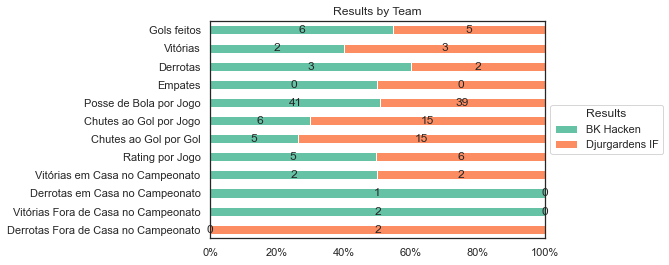

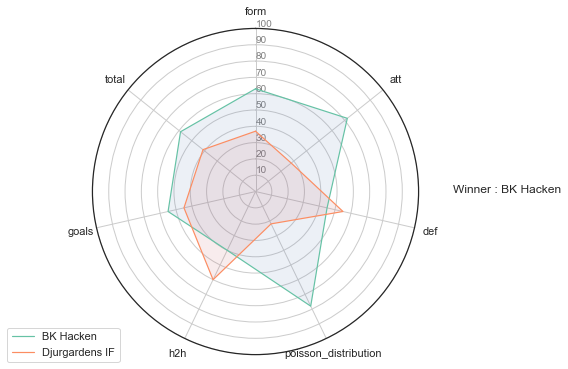

In [45]:
#visualização dos resultados
viz_stacked(df_confronto)
viz_radar(predictions_viz)